In [19]:
#import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor




In [2]:
df = catalog.load('election_without_outliers_dataset')
df

2022-06-29 23:40:08,630 - kedro.io.data_catalog - INFO - Loading data from `election_without_outliers_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1570392602000000000,0.00,0.000000,0.030612,0.002914,0.001289,0.000701,0.000663,0.000695,0.000817,0.000821,0.000650,0.000672,0.75,0.0,0.001288,0.074468,0.056604
1,1570392602000000000,0.00,0.000000,0.030612,0.002914,0.001289,0.000701,0.000663,0.000695,0.000817,0.000821,0.000650,0.000672,0.85,0.0,0.001171,0.074468,0.066038
2,1570392602000000000,0.00,0.000000,0.030612,0.002914,0.001289,0.000701,0.000663,0.000695,0.000817,0.000821,0.000650,0.000672,0.05,0.0,0.000254,0.010638,0.018868
3,1570392602000000000,0.00,0.000000,0.030612,0.002914,0.001289,0.000701,0.000663,0.000695,0.000817,0.000821,0.000650,0.000672,0.10,0.0,0.000209,0.010638,0.009434
4,1570392602000000000,0.00,0.000000,0.030612,0.002914,0.001289,0.000701,0.000663,0.000695,0.000817,0.000821,0.000650,0.000672,0.55,0.0,0.000081,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20441,1570408501000000000,0.95,0.035398,0.073404,0.088702,0.038401,0.041367,0.036659,0.034347,0.037316,0.041558,0.038751,0.034869,0.45,0.0,0.000177,0.000000,0.000000
20442,1570408501000000000,0.95,0.035398,0.073404,0.088702,0.038401,0.041367,0.036659,0.034347,0.037316,0.041558,0.038751,0.034869,0.70,0.0,0.000174,0.000000,0.000000
20443,1570408501000000000,0.95,0.035398,0.073404,0.088702,0.038401,0.041367,0.036659,0.034347,0.037316,0.041558,0.038751,0.034869,0.40,0.0,0.000137,0.000000,0.000000
20444,1570408501000000000,0.95,0.035398,0.073404,0.088702,0.038401,0.041367,0.036659,0.034347,0.037316,0.041558,0.038751,0.034869,0.90,0.0,0.000128,0.000000,0.000000


In [ ]:
#SEM FUNCAO

# Create dependent variables
X = df.drop(columns=['FinalMandates'])
y = df['FinalMandates']

# Slipt data 
X_train, X_test, y_train, y_test = train_test_split(
df, y, test_size = 0.3, random_state = 9999, stratify = y
)
    

regression = GradientBoostingRegressor()
regression.fit(X_train, y_train)
    
#Predicts test set 
y_pred = regression.predict(X_test)
    
#Reports Score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))


MAE: 2.3823598639148213e-07
MSE: 2.9348695850388426e-13
RMSE: 5.417443663794616e-07
R2 score: 0.9999999989823279


In [31]:
print(y_test)
print(y_pred)

15862    0.018868
11695    0.037736
837      0.000000
8031     0.000000
5398     0.000000
           ...   
2616     0.000000
8614     0.000000
6958     0.000000
15876    0.000000
17480    0.000000
Name: FinalMandates, Length: 6134, dtype: float64
[1.88676479e-02 3.77349109e-02 1.42006371e-07 ... 1.42006371e-07
 1.42006371e-07 1.42006371e-07]


In [35]:
resultado_final = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred})
resultado_final

,TestValues,PredictedValues
15862,0.018868,1.886765e-02
11695,0.037736,3.773491e-02
837,0.000000,1.420064e-07
8031,0.000000,1.420064e-07
5398,0.000000,1.420064e-07
...,...,...
2616,0.000000,1.420064e-07
8614,0.000000,1.420064e-07
6958,0.000000,1.420064e-07
15876,0.000000,1.420064e-07


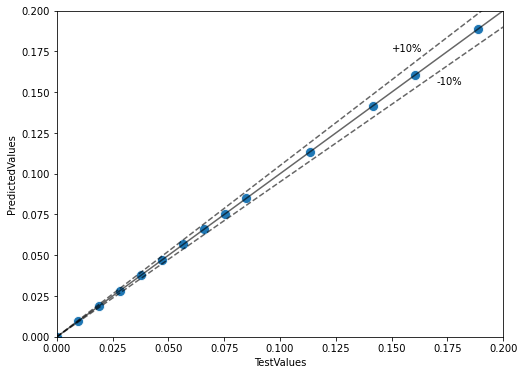

In [123]:
fig, ax = plt.subplots(figsize=(8, 6))

x1=[0,0.2]
y1=x1
y2=[0,0.21]
y3=[0,0.19]
sns.scatterplot(x=resultado_final['TestValues'], y=resultado_final['PredictedValues'], s=100)
sns.lineplot(x=x1, y=y1, color='black', linestyle='-', alpha=0.6)
sns.lineplot(x=x1, y=y2, color='black', linestyle='--', alpha=0.6)
sns.lineplot(x=x1, y=y3, color='black', linestyle='--', alpha=0.6)

ax.text(0.15, 0.175, "+10%")
ax.text(0.17, 0.155, "-10%")

plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.show() 

In [ ]:
def func_split_data(df, test_size = 0.3, random_state = 9999):
    
    """Splits data into train and test datasets"""
    
    # Create dependent variables
    X = df.drop(columns=['FinalMandates'])
    y = df['FinalMandates']

    # Slipt data 
    X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size = test_size, random_state = random_state, stratify = y
    )
    
    return X_train, X_test, y_train, y_test

In [4]:
#Test func_split_data

X_train, X_test, y_train, y_test = func_split_data(df)

In [75]:
def func_fit_model(X_train, X_test, y_train, y_test):
    
    """Fits five regression models using a training dataset"""
    
    model=[LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor()]

    for model in model:
        model.fit(X_train, y_train)
        score = model.score(X_train, y_train)
        pred=model.predict(X_test)
        print('Score of',model,'is:',score)
        print('MAE:',mean_absolute_error(y_test,pred))
        print('MSE:',mean_squared_error(y_test,pred))
        #print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
        print('R2 score:',r2_score(y_test,pred))
        print('*'*100)
        print('\n') 
        resultado_final = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred})


        
    return model

In [76]:
# Test func_fit_model 

func_fit_model(X_train, X_test, y_train, y_test)

Score of LinearRegression() is: 0.9990987450036452
MAE: 0.0004402487332301595
MSE: 2.599083434144122e-07
R2 score: 0.9990987625282132
****************************************************************************************************


Score of SVR() is: -27.57286856126739
MAE: 0.08998714249681636
MSE: 0.008255406169767556
R2 score: -27.625788950344855
****************************************************************************************************


Score of RandomForestRegressor() is: 0.9999999741676042
MAE: 9.227873098958617e-08
MSE: 1.7411081317566652e-11
R2 score: 0.9999999396267211
****************************************************************************************************


Score of GradientBoostingRegressor() is: 0.9999999989814086
MAE: 2.3823598639147819e-07
MSE: 2.9348695850400684e-13
R2 score: 0.9999999989823279
****************************************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 1.56

DecisionTreeRegressor()

In [77]:
def func_final_result(y_test,y_pred):
    
    """Essa funcao cria um df com os resultados do test e preditos do modelo"""
    
    
    resultado_final = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred})


    return resultado_final

In [79]:
# Test func_fit_model 

func_final_result(y_test,y_pred)

,TestValues,PredictedValues
15862,0.018868,1.886765e-02
11695,0.037736,3.773491e-02
837,0.000000,1.420064e-07
8031,0.000000,1.420064e-07
5398,0.000000,1.420064e-07
...,...,...
2616,0.000000,1.420064e-07
8614,0.000000,1.420064e-07
6958,0.000000,1.420064e-07
15876,0.000000,1.420064e-07


In [12]:
def func_fit_model(X_train, X_test, y_train, y_test):
    
    """Fits a classifier model using a training dataset"""
    
    regression = GradientBoostingRegressor()
    regression.fit(X_train, y_train)
    
    #Predicts test set 
    y_pred = regression.predict(X_test)
    
    #Reports Score
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 score:',r2_score(y_test,y_pred))
    
    return y_pred

In [13]:
# Test func_fit_model 

func_fit_model(X_train, X_test, y_train, y_test)

MAE: 2.3823598639152864e-07
MSE: 2.934869585044198e-13
RMSE: 5.417443663799558e-07
R2 score: 0.9999999989823279


array([1.88676479e-02, 3.77349109e-02, 1.42006371e-07, ...,
       1.42006371e-07, 1.42006371e-07, 1.42006371e-07])